<a href="https://colab.research.google.com/github/germanpiasco/Coder/blob/main/German_Piasco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importando Librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Primer conjunto de datos
# Copa Mundial de la FIFA 2022 ⚽️🏆

Partidos internacionales de fútbol y equipos fuertes entre 1993 y 2022

Este conjunto de datos proporciona una descripción completa de todos los partidos de fútbol internacionales jugados desde los años 90. Entre las distintas variables potencialmente interesantes que presenta este Data Set se pueden especificar: Nacionalidad de los equipos, Continente de correspondencia a cada equipo,posiciones en ranking de cada equipo, ciudades y países dónde se realizan los encuentros, etc. El valor agregado de las mismas puede estar potenciado para futuros análisis y búsqueda de patrones que puedan monetizarse según el objetivo de la investigación. Además de eso, la fuerza de cada equipo se proporciona mediante la incorporación de clasificaciones reales de la FIFA, así como las fortalezas de los jugadores basadas en el videojuego EA Sport FIFA.

In [7]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQlKd3e78RjHKWaPXR8ewnWJTNfcXIgalp2gxwvsoU1RfYzzEsqUa1Yst6U4WEGVrBETyN6w-RhtfJF/pub?gid=110461248&single=true&output=csv')

Leemos el archivo desde google sheets con pandas

In [8]:
df.tail() 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


In [26]:
num_cols = list(df.select_dtypes(include=['int64','float64']).columns)

cat_cols = list(df.select_dtypes(include=['object']).columns)

print(f'Numerical columns: \n\n{num_cols}\n\nCategorical columns: \n\n{cat_cols}')

Numerical columns: 

['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']

Categorical columns: 

['date', 'home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'shoot_out', 'home_team_result']


# Tratemos de responder las siguientes preguntas:

1.   ¿Qué equipo tiene los mejores jugadores de porteria, defensa, mediocampo y ataque?
1.   ¿Existe realmente una ventaja de equipo local?
2.   ¿Los equipos con jugadores más fuertes en ataque marcan más goles? ¿Y los equipos con porteros más fuertes reciben menos goles?
1.   ¿Qué equipo tiene la racha ganadora más larga?
2.   ¿El mejor equipo siempre gana? ¿Puedes explicar por qué a veces gana un equipo más débil?
1.   Se puede predecir el proximo ganador del mundial?


# Graficos usando matplotlib
Un dato a tener en cuenta es que si el equipo local tiene ventajas de ganar un partido por sobre un equipo visitante. Se eliminan las observaciones donde el partido se disputó en un estadio neutral

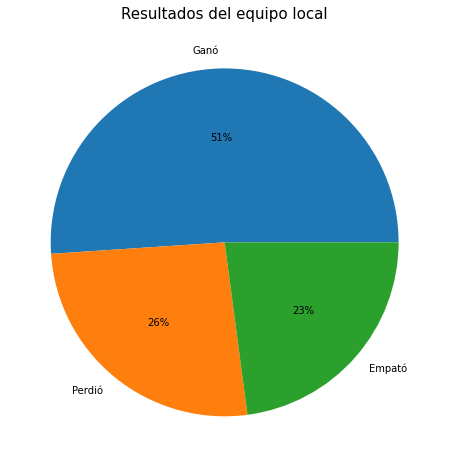

In [10]:

home_team_advantage = df[df['neutral_location']==False]['home_team_result'].value_counts(normalize=True)
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Ganó',  'Perdió', 'Empató'],  autopct='%.0f%%')
plt.title('Resultados del equipo local', fontsize = 15)
plt.show()

De la grafica podemos llegar a suponer que la localía juega un papel importante en el resultado de un partido, pero no te asegura una victoria

# Primero vamos a crear el TOP 10 de equipos según el ranking de FIFA.

In [11]:
fifa_rank = df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = fifa_rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home,away])
#Seleccionar el último partido de cada país
fifa_rank = fifa_rank.sort_values(['team','date'],ascending=[True,False])
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank',ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


# Realizamos un grafico de barras según este TOP 10

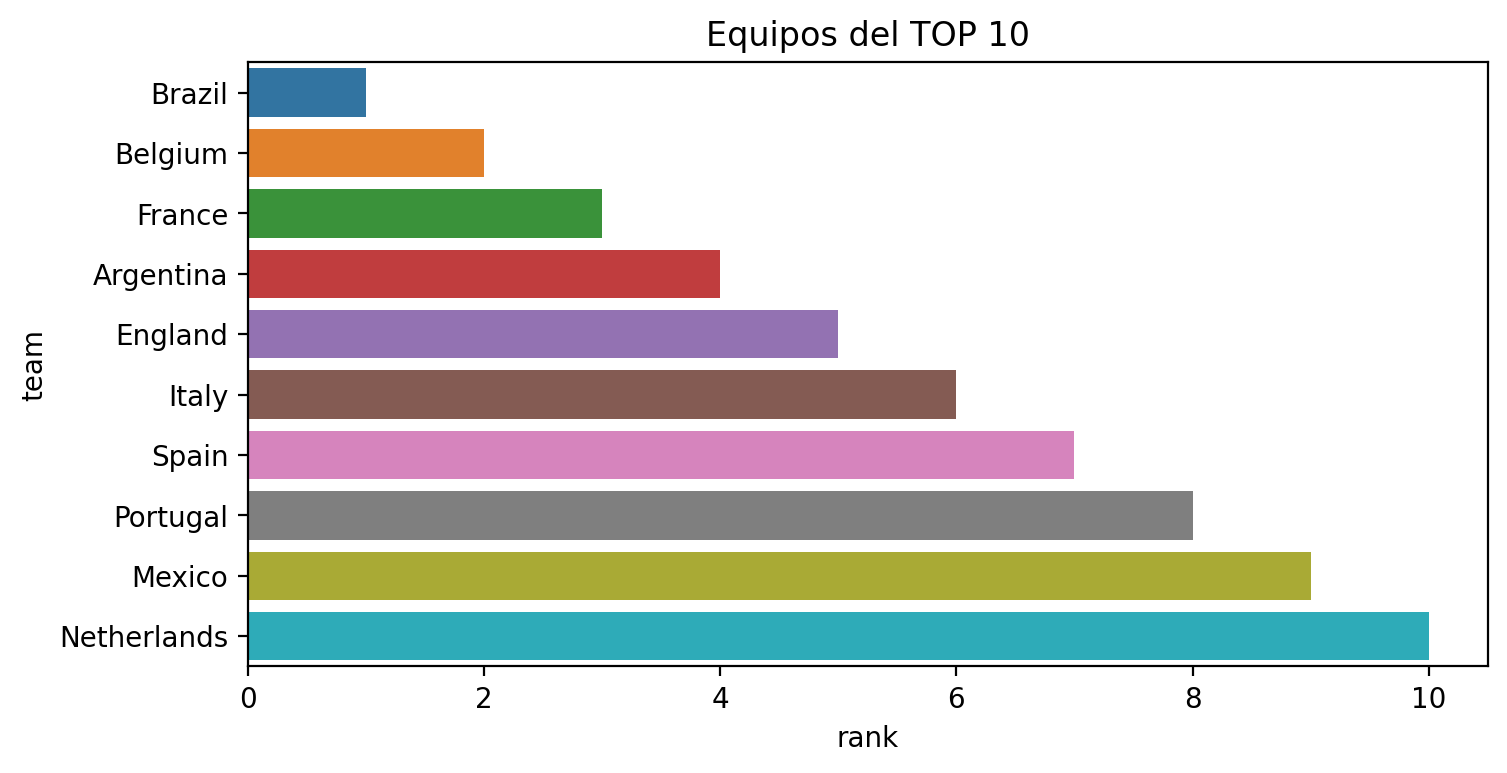

In [12]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(data=fifa_rank_top10,y='team',x='rank')
plt.title("Equipos del TOP 10");

# ¿Quién tiene más probabilidades de ganar el partido inaugural?
El 20 de noviembre el partido inaugural lo disputaran Qatar y Ecuador. ¿Qué equipo tiene más probabilidades de ganar?

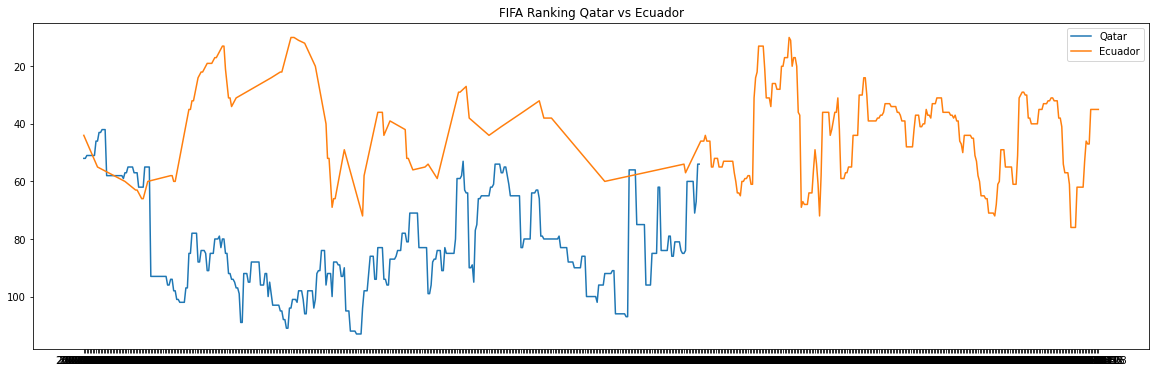

In [13]:
fig, axes = plt.subplots(1,1,  figsize=(20, 6))
qat = fifa_rank[fifa_rank['team']=='Qatar']
ecu = fifa_rank[fifa_rank['team']=='Ecuador']
ax = sns.lineplot(data = qat, x = 'date', y = 'rank', label = 'Qatar')
ax = sns.lineplot(data = ecu, x = 'date', y = 'rank', label = 'Ecuador' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Qatar vs Ecuador')
plt.show()

Históricamente, Ecuador se desempeñó bastante mejor que Qatar. En los ultimos años la calidad de Qatar ha mejorado claramente y además jugará el partido como local.

# Ahora vamos a seleccionar los 32 equipos que participan en el Mundial de Qatar 2022

In [14]:
fifa2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [15]:
ranks = []
for x in fifa2022_teams:
    rank_df = df[(df['home_team']== x) | (df['away_team']== x)].sort_values(['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True]).iloc[0]
    if rank_df['home_team']==x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team':fifa2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


Una vez seleccionado los 32 equipos, ahora queda averiguar quien es el mejor estadisticamente, por ende vamos a analizar a los mejores en cada sector del campo


# 1. Goalkeeper score

In [16]:
goalkeeper_score = []
for x in fifa2022_teams:
    gk_score = np.round((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean() + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2, 2)
    goalkeeper_score.append(gk_score)

goalkeeper_scores = pd.DataFrame({'Team':fifa2022_teams, 'Gk score': goalkeeper_score}).sort_values('Gk score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1
goalkeeper_scores

,Team,Gk score
1,Germany,89.02
2,Spain,88.78
3,France,86.86
4,Brazil,86.28
5,England,83.25
6,Netherlands,83.23
7,Belgium,82.41
8,Poland,82.10
9,Portugal,81.81
10,USA,81.12


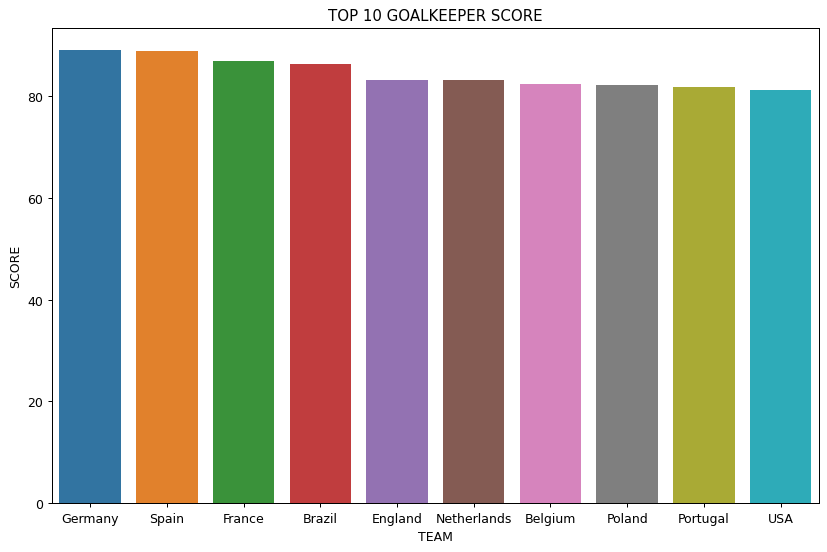

In [17]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='Gk score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 GOALKEEPER SCORE');

En el top 3 de porteros estan: Alemania, España y Francia. Los ultimos 3 campeones del mundo, eso quiere decir que tener un gran portero te inclina la balana hacia la victoria.

# 2. Defence score

In [18]:
defence_score = []
for x in fifa2022_teams:
    df_score = np.round((df[df["home_team"]==x]['home_team_mean_defense_score'].mean() + df[df["away_team"]==x]['away_team_mean_defense_score'].mean())/2, 2)
    defence_score.append(df_score)

defence_scores = pd.DataFrame({'Team':fifa2022_teams, 'Df score': defence_score}).sort_values('Df score', ascending=False).reset_index(drop=True)
defence_scores.index += 1
defence_scores

,Team,Df score
1,Brazil,85.94
2,Spain,85.51
3,Germany,84.69
4,England,84.69
5,France,84.09
6,Argentina,83.00
7,Portugal,82.89
8,Belgium,81.23
9,Netherlands,80.73
10,Serbia,80.23


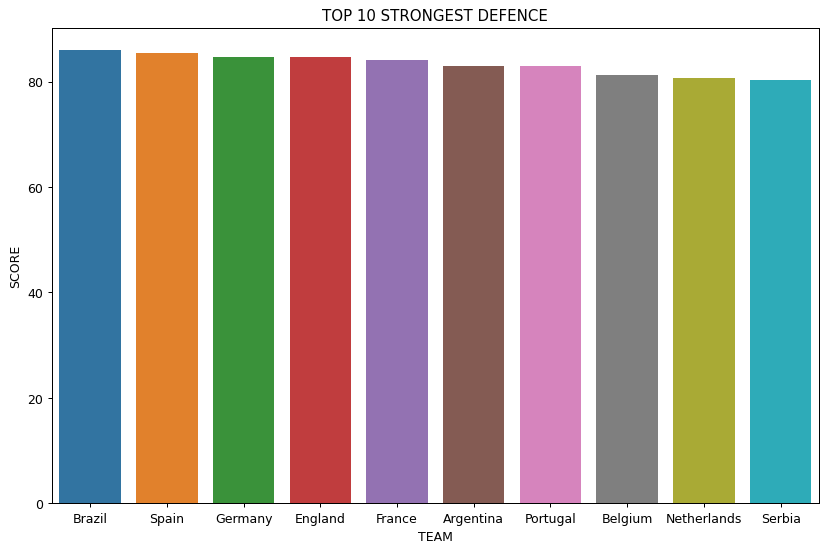

In [19]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=defence_scores[:10], x='Team', y='Df score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 STRONGEST DEFENCE');

En defensa los equipos estan todos muy parejos pero se puede observar que son los mismos paises que en el analisis de porteros, salvo 2, Argentina y Serbia, eso se puede referir a que un buen portero necesita una buena defensa

# 3. Offence score

In [20]:
offence_score = []
for x in fifa2022_teams:
    of_score = np.round((df[df["home_team"]==x]['home_team_mean_offense_score'].mean() + df[df["away_team"]==x]['away_team_mean_offense_score'].mean())/2, 2)
    offence_score.append(of_score)

offence_scores = pd.DataFrame({'Team':fifa2022_teams, 'Of score': offence_score}).sort_values('Of score', ascending=False).reset_index(drop=True)
offence_scores.index += 1
offence_scores

,Team,Of score
1,Argentina,88.25
2,Brazil,86.55
3,Spain,85.87
4,France,85.70
5,Netherlands,85.47
6,England,85.09
7,Portugal,84.93
8,Uruguay,83.60
9,Germany,83.59
10,Belgium,81.71


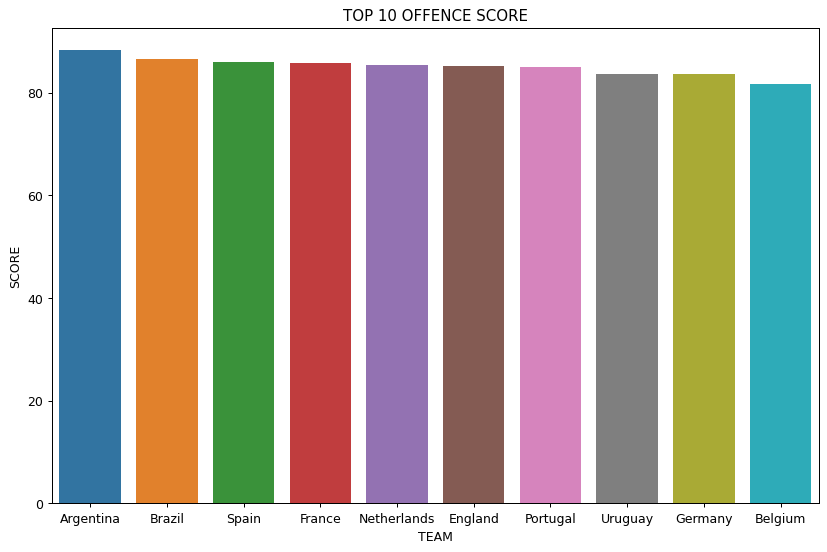

In [21]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=offence_scores[:10], x='Team', y='Of score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 OFFENCE SCORE');

Suele decirse que el puesto más importante en el fútbol es el de delantero, por ende se necesita una buena ofensiva para ganar los partidos. Eso deja muy bien posicionado a Argentina.

# 4. Midfield score

In [22]:
midfield_score = []
for x in fifa2022_teams:
    md_score = np.round((df[df["home_team"]==x]['home_team_mean_midfield_score'].mean() + df[df["away_team"]==x]['away_team_mean_midfield_score'].mean())/2, 2)
    midfield_score.append(md_score)

midfield_scores = pd.DataFrame({'Team':fifa2022_teams, 'Md score': midfield_score}).sort_values('Md score', ascending=False).reset_index(drop=True)
midfield_scores.index += 1
midfield_scores

,Team,Md score
1,Spain,87.12
2,France,86.16
3,Germany,85.80
4,Brazil,85.35
5,England,84.52
6,Argentina,84.44
7,Netherlands,83.70
8,Portugal,83.59
9,Belgium,81.52
10,Croatia,81.21


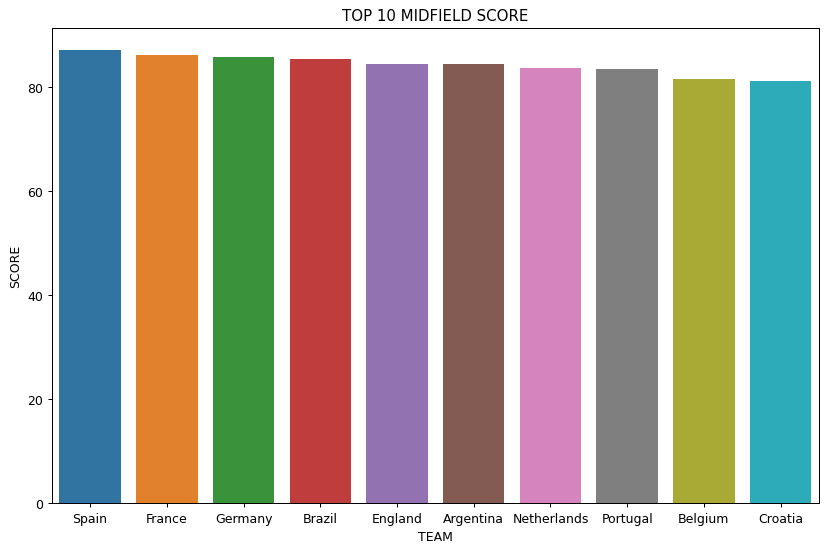

In [23]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=midfield_scores[:10], x='Team', y='Md score')
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 MIDFIELD SCORE');

En el medicampo podemos observar que estan todos muy parejos pero se vuelve a repetir el factor de los antiguos campeones, eso puede estar diciendo que quizas no ganan los que tienen mejor ofensiva

In [34]:
 hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in fifa2022_teams:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

win_draw_lose = pd.DataFrame({'Team':fifa2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})
win_draw_lose = pd.DataFrame({'Team':fifa2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'gray', 'color':'yellow'}, subset=['Home win','Home Win %','Win %'])


,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000
